# Apple Health Mobility Report

Our goal is to build a report with the Apple Health data that can be used by Physical Therapists to assess the progress of their patients.

To do this we will use the full export of the Apple Health App and [convert it to a Pandas Dataframe using Milind Ganjoo's Apple Health Exporter code](https://github.com/mganjoo/apple-health-exporter).

## Getting the user data to display

1. Export Apple Health data from within the Health app.

![click on "user" icon and then on "export health data"](images/exporting.png)

In [91]:
#%%capture

import os 
import sys 

!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install pandas pyarrow lxml ipywidgets
# pip install git+git://github.com/ipython/ipywidgets.git
!{sys.executable} -m pip install git+https://github.com/brunoamaral/apple-health-exporter.git


  Cloning https://github.com/brunoamaral/apple-health-exporter.git to /private/var/folders/xb/7x2qm97153q23rhtss8tmvwm0000gn/T/pip-req-build-9t7w4ggk
  Running command git clone --filter=blob:none --quiet https://github.com/brunoamaral/apple-health-exporter.git /private/var/folders/xb/7x2qm97153q23rhtss8tmvwm0000gn/T/pip-req-build-9t7w4ggk
  Resolved https://github.com/brunoamaral/apple-health-exporter.git to commit 7b89a9d49496f1bb3beae4eb15208a5fb2b4688d
  Preparing metadata (setup.py) ... done


This isn't workin at the moment, but the file needs to be export.zip placed in the root of the notebook.

In [92]:
# from ipywidgets import FileUpload
# upload = FileUpload()
# upload
# !{sys.executable} -m pip install fileupload
# from IPython.display import display
# import fileupload

# uploader = fileupload.FileUploadWidget()

# def _handle_upload(change):
#     w = change['owner']
#     with open(w.filename, 'wb') as f:
#         f.write(w.data)
#     print('Uploaded `{}` ({:.2f} kB)'.format(
#         w.filename, len(w.data) / 2**10))

# uploader.observe(_handle_upload, names='data')

# display(uploader)

Proceeding with default values

In [93]:
from apple_health_exporter import export

export.health_xml_to_feather(zip_file='patient-data/export.zip',output_file='patient-data/data.feather')

import pandas as pd
data = pd.read_feather("data.feather")
# data.groupby("type").size()



# Metrics and their respective data types

1. **Distance Cycling** : HKQuantityTypeIdentifierDistanceCycling
2. **Double support time** : HKQuantityTypeIdentifierWalkingDoubleSupportPercentage
3. **Exercise minutes** : HKQuantityTypeIdentifierAppleExerciseTime
4. **Six minute walk** : HKQuantityTypeIdentifierSixMinuteWalkTestDistance
5. **Stair speed down** : HKQuantityTypeIdentifierStairDescentSpeed
6. **Stair speed up** : HKQuantityTypeIdentifierStairAscentSpeed
7. **Step length** : HKQuantityTypeIdentifierWalkingStepLength
8. **Walking and running distance** : HKQuantityTypeIdentifierDistanceWalkingRunning
9. **Walking assymetry** : HKQuantityTypeIdentifierWalkingAsymmetryPercentage 
10. **Walking speed** : HKQuantityTypeIdentifierWalkingSpeed 
11. **Walking steadyness** (last 4 weeks) : HKQuantityTypeIdentifierAppleWalkingSteadiness

## Distance cycling

This value is calculated using the iPhone's GPS every time the user registers a Cycling Workout.


## Double support time 

> This is the percentage of time during a walk that both feet are on the ground. A lower value means you spend more of your walk with your weight on one foot instead of two, which can be a sign of better balance. During a typical walk this measure will fall between 20 and 40%.
>
> Walking requires strength and coordination. Changes in these can affect your balance and two-foot contact time.
>
> Double support time naturally varies with how fast vou walk and the terrain, but may increase with age.
>
> Double support time is recorded automatically on iPhone when you carry your phone near vour waist, such as in a trouser pocket, and walk steadily over flat ground.

**Source:** Apple Health App on iOS 15.4

## Exercise minutes

> Every full minute of movement equal to or
exceeding the intensity of a brisk walk for vou
counts towards our dailv Exercise minutes.

**Source:** Apple Health App on iOS 15.4

## Six minute walk

> This is an estimate of how far you can walk on
flat ground in six minutes based on a week of
vour motion and workout data. The fitter vou
are, the higher this number will be.
>
> This prediction is considered a measure of your
capacity for exercise. Longer distances are
associated with healthier cardiac, respiratory,
circulatory and neuromuscular function, and
may reflect your ability to perform everyday
activities. Improvements in fitness and mobility
can increase our six-minute walk distance.
>
> The standard six-minute walk test measures
the maximum number of metres you can walk
on an unobstructed, flat course doing laps of a
standard length. The test is often given to
those who are recovering from a cardiac or
respiratory condition. You can get a predicted
six-minute walk distance up to 500 metres
using data from a device, such as Apple Watch.

**Source:** Apple Health App on iOS 15.4

## Stair speed down

> This is a measurement of how fast vou walk
down the stairs.
>
> Descending stairs safely is an important
indicator of our overall mobility.
> Descending stairs requires strength and
coordination. Changes in these factors, or pain,
can affect your speed.
> Apple Watch records your vertical speed when
you go down a flight that is at least 3 metres
(10 feet).

**Source:** Apple Health App on iOS 15.4


## Stair speed up 

>This is a measurement of how fast vou walk up
the stairs.
>
> Climbing stairs quickly can be a sign of strong
cardiovascular and musculoskeletal health.
>
> Walking up stairs requires strength,
coordination and aerobic fitness. Changes in
these factors, or pain, can affect your speed.
Apple Watch records your vertical speed when
you go up a flight that is at least 3 metres (10
feet).

**Source:** Apple Health App on iOS 15.4

## Step lenght 

## Walking and running distance

## Walking assymetry

> In a healthy walking pattern, the timing of the steps you take with each foot are very similar. Walking asymmetry is the per cent of time your steps with one foot are faster or slower than the other foot. This means the lower the percentage of asymmetry, the healthier your walking pattern.
>
> Uneven walking patterns, such as limping, can
be a sign of disease, injury or other health
issues. An even or symmetrical walk is often an
important physical theraov goal when
recovering from injury.
> 
> Your iPhone can record walking asymmetry
automaticallv when vou carrv vour phone near
your waist - such as in a pocket - and walk
steadilv on flat ground.

**Source:** Apple Health App on iOS 15.4



## Walking speed



## Walking steadyness

> This is an estimate of your stability while
walking. iPhone calculates Walking Steadiness
using your walking speed, step length, double
support time and walking asymmetry data
that's stored in Health. This provides a sense of
the way you walk.
>
> Your steadiness is also related to your fall risk.
As steadiness goes down, your risk of falling
goes up. Walking Steadiness is not an
indication of how likelv vou are to fall in anv
given moment, but an overall sense of fall risk
in the next 12 months.
> 
> iPhone can automatically record your Walking
Steadiness in Health when you carry your
iPhone in a pocket or holder near our waist.
You can also receive a notification if vour
Walking Steadiness is low or very low. You can
manage these notifications in Health Checklist.

**Source:** Apple Health App on iOS 15.4




Callable object methods in the `data` variable:

```
['__abs__', '__add__', '__and__', '__array__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '__xor__', '_accum_func', '_add_numeric_operations', '_agg_by_level', '_align_frame', '_align_series', '_arith_method', '_as_manager', '_box_col_values', '_check_inplace_and_allows_duplicate_labels', '_check_inplace_setting', '_check_is_chained_assignment_possible', '_check_label_or_level_ambiguity', '_check_setitem_copy', '_clear_item_cache', '_clip_with_one_bound', '_clip_with_scalar', '_cmp_method', '_combine_frame', '_consolidate', '_consolidate_inplace', '_construct_axes_dict', '_construct_axes_from_arguments', '_construct_result', '_constructor', '_constructor_sliced', '_convert', '_count_level', '_dir_additions', '_dir_deletions', '_dispatch_frame_op', '_drop_axis', '_drop_labels_or_levels', '_ensure_valid_index', '_find_valid_index', '_from_arrays', '_from_mgr', '_get_agg_axis', '_get_axis', '_get_axis_name', '_get_axis_number', '_get_axis_resolvers', '_get_block_manager_axis', '_get_bool_data', '_get_cleaned_column_resolvers', '_get_column_array', '_get_index_resolvers', '_get_item_cache', '_get_label_or_level_values', '_get_numeric_data', '_get_value', '_getitem_bool_array', '_getitem_multilevel', '_gotitem', '_indexed_same', '_info_repr', '_init_mgr', '_inplace_method', '_is_label_or_level_reference', '_is_label_reference', '_is_level_reference', '_iset_item', '_iset_item_mgr', '_iset_not_inplace', '_iter_column_arrays', '_ixs', '_join_compat', '_logical_func', '_logical_method', '_maybe_cache_changed', '_maybe_update_cacher', '_min_count_stat_function', '_needs_reindex_multi', '_protect_consolidate', '_reduce', '_reindex_axes', '_reindex_columns', '_reindex_index', '_reindex_multi', '_reindex_with_indexers', '_replace_columnwise', '_repr_data_resource_', '_repr_fits_horizontal_', '_repr_fits_vertical_', '_repr_html_', '_repr_latex_', '_reset_cache', '_reset_cacher', '_sanitize_column', '_set_axis', '_set_axis_name', '_set_axis_nocheck', '_set_is_copy', '_set_item', '_set_item_frame_value', '_set_item_mgr', '_set_value', '_setitem_array', '_setitem_frame', '_setitem_slice', '_slice', '_stat_function', '_stat_function_ddof', '_take_with_is_copy', '_to_dict_of_blocks', '_update_inplace', '_validate_dtype', '_where', 'abs', 'add', 'add_prefix', 'add_suffix', 'agg', 'aggregate', 'align', 'all', 'any', 'append', 'apply', 'applymap', 'asfreq', 'asof', 'assign', 'astype', 'at_time', 'backfill', 'between_time', 'bfill', 'bool', 'boxplot', 'clip', 'combine', 'combine_first', 'compare', 'convert_dtypes', 'copy', 'corr', 'corrwith', 'count', 'cov', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'div', 'divide', 'dot', 'drop', 'drop_duplicates', 'droplevel', 'dropna', 'duplicated', 'eq', 'equals', 'eval', 'ewm', 'expanding', 'explode', 'ffill', 'fillna', 'filter', 'first', 'first_valid_index', 'floordiv', 'from_dict', 'from_records', 'ge', 'get', 'groupby', 'gt', 'head', 'hist', 'idxmax', 'idxmin', 'iloc', 'infer_objects', 'info', 'insert', 'interpolate', 'isin', 'isna', 'isnull', 'items', 'iteritems', 'iterrows', 'itertuples', 'join', 'keys', 'kurt', 'kurtosis', 'last', 'last_valid_index', 'le', 'loc', 'lookup', 'lt', 'mad', 'mask', 'max', 'mean', 'median', 'melt', 'memory_usage', 'merge', 'min', 'mod', 'mode', 'mul', 'multiply', 'ne', 'nlargest', 'notna', 'notnull', 'nsmallest', 'nunique', 'pad', 'pct_change', 'pipe', 'pivot', 'pivot_table', 'plot', 'pop', 'pow', 'prod', 'product', 'quantile', 'query', 'radd', 'rank', 'rdiv', 'reindex', 'reindex_like', 'rename', 'rename_axis', 'reorder_levels', 'replace', 'resample', 'reset_index', 'rfloordiv', 'rmod', 'rmul', 'rolling', 'round', 'rpow', 'rsub', 'rtruediv', 'sample', 'select_dtypes', 'sem', 'set_axis', 'set_flags', 'set_index', 'shift', 'skew', 'slice_shift', 'sort_index', 'sort_values', 'squeeze', 'stack', 'std', 'sub', 'subtract', 'sum', 'swapaxes', 'swaplevel', 'tail', 'take', 'to_clipboard', 'to_csv', 'to_dict', 'to_excel', 'to_feather', 'to_gbq', 'to_hdf', 'to_html', 'to_json', 'to_latex', 'to_markdown', 'to_numpy', 'to_parquet', 'to_period', 'to_pickle', 'to_records', 'to_sql', 'to_stata', 'to_string', 'to_timestamp', 'to_xarray', 'to_xml', 'transform', 'transpose', 'truediv', 'truncate', 'tz_convert', 'tz_localize', 'unstack', 'update', 'value_counts', 'var', 'where', 'xs']
```

Get walking distance as a new dataframe

In [104]:
walking_distance = data.loc[data['type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning']
walking_distance

,type,sourceName,unit,startDate,endDate,value
373220,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2021-01-22 11:54:01+00:00,2021-01-22 11:54:04+00:00,0.001425
373221,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2021-01-22 12:01:26+00:00,2021-01-22 12:01:44+00:00,0.032048
373222,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2021-01-22 12:03:03+00:00,2021-01-22 12:04:04+00:00,0.004288
373223,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2021-01-22 12:48:19+00:00,2021-01-22 12:48:35+00:00,0.034540
373224,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2021-01-22 12:48:47+00:00,2021-01-22 12:48:50+00:00,0.004893
...,...,...,...,...,...,...
517907,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-03-17 20:58:56+00:00,2022-03-17 20:58:58+00:00,0.008218
517908,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-03-17 21:00:07+00:00,2022-03-17 21:00:12+00:00,0.003049
517909,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-03-17 21:00:12+00:00,2022-03-17 21:00:58+00:00,0.038744
517910,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-03-17 21:02:20+00:00,2022-03-17 21:02:25+00:00,0.018387


In [105]:

from datetime import datetime
datetime.now()
lastdayfrom = pd.to_datetime(datetime.now())

# Convert the startDate format to be timezone naive, localizing to current timezone
# walking_distance['startDate'] = pd.to_datetime(data.startDate).dt.tz_localize(None)
walking_distance = walking_distance.set_index('startDate')
walking_distance.sort_index()


,type,sourceName,unit,endDate,value
startDate,,,,,
2015-10-13 10:43:26+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Sonic Screwdriver,km,2015-10-13 10:47:08+00:00,0.021590
2015-10-13 11:30:42+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Sonic Screwdriver,km,2015-10-13 11:31:34+00:00,0.021700
2015-10-13 11:41:07+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Sonic Screwdriver,km,2015-10-13 11:47:07+00:00,0.011200
2015-10-13 11:47:07+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Sonic Screwdriver,km,2015-10-13 11:49:18+00:00,0.045820
2015-10-13 12:11:22+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Sonic Screwdriver,km,2015-10-13 12:11:47+00:00,0.019940
...,...,...,...,...,...
2022-03-17 20:58:56+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-03-17 20:58:58+00:00,0.008218
2022-03-17 21:00:07+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-03-17 21:00:12+00:00,0.003049
2022-03-17 21:00:12+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-03-17 21:00:58+00:00,0.038744


In [106]:
last30days = walking_distance.last('30D')
last30days

,type,sourceName,unit,endDate,value
startDate,,,,,
2022-02-15 21:02:35+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-02-15 21:02:37+00:00,0.002849
2022-02-15 21:07:54+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-02-15 21:08:37+00:00,0.021075
2022-02-15 21:11:24+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-02-15 21:11:26+00:00,0.004295
2022-02-15 21:02:25+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,SonicScrewdriver,km,2022-02-15 21:06:37+00:00,0.023930
2022-02-15 22:08:56+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-02-15 22:09:04+00:00,0.020329
...,...,...,...,...,...
2022-03-17 20:58:56+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-03-17 20:58:58+00:00,0.008218
2022-03-17 21:00:07+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-03-17 21:00:12+00:00,0.003049
2022-03-17 21:00:12+00:00,HKQuantityTypeIdentifierDistanceWalkingRunning,Chronograph,km,2022-03-17 21:00:58+00:00,0.038744


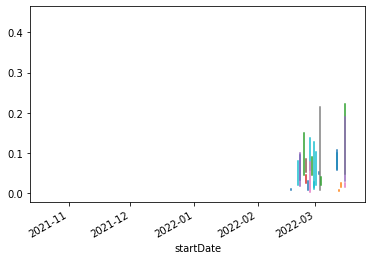

In [125]:
import matplotlib.pyplot as plt
chart=last30days.groupby(['startDate', pd.Grouper(freq='W-MON')])['value']
chart.plot()
plt.show()